## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости. Используйте L1 расстояние для расчетов и визуализации.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from copy import copy
from tqdm import tqdm

In [2]:
df = pd.read_csv('tsp.csv', names=['x', 'y'])
data = np.array(df)
n = data.shape[0]

In [3]:
def L1(p_1, p_2):
    return np.sum(np.abs(p_1-p_2))

def score(data_ind):
    s = 0
    
    for i in range(1, n):
        s += L1(data[data_ind[i-1]], data[data_ind[i]])
    
    return s

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

best score =  26280


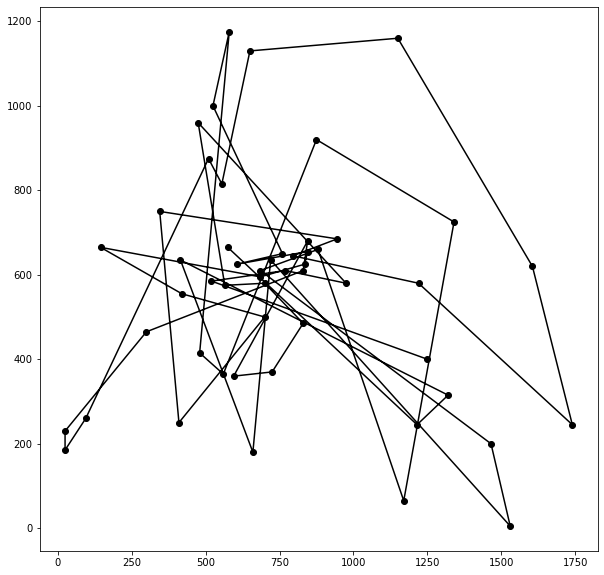

In [4]:
it = 50000 # set
score_route = []
for _ in range(it):
    data_ind = np.random.permutation(n)
    score_route.append([score(data_ind), data_ind])
best_score, best_route = min(score_route)
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

<ipython-input-5-ec95d663573b>:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  w = [1/L1(data[route[-1]], data[x]) for x in data_ind]


best score =  20360


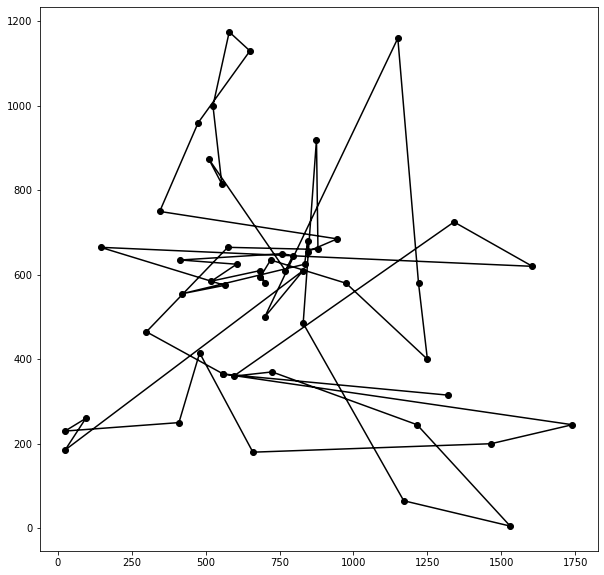

In [5]:
it = 1000 # Set
score_route = []
for _ in range(it):
    data_ind = [i for i in range(n)]
    route = []
    route.append(random.choice(data_ind))
    while len(data_ind) > 0:
        w = [1/L1(data[route[-1]], data[x]) for x in data_ind]
        route.append(random.choices(data_ind, w)[0])
        data_ind.remove(route[-1])
    s = score(route)
    score_route.append([s, route])
best_score, best_route = min(score_route)
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

In [64]:
def slight_change(data_ind):
    for _ in range(100):
        route = copy(data_ind)
        s = score(route)
        nb_1, nb_2 = np.random.randint(0, n), np.random.randint(0, n)
        route[nb_1] = data_ind[nb_2]
        route[nb_2] = data_ind[nb_1]
        tmp_s = score(route)
        if tmp_s < s:
            if 'best_s' in locals() and tmp_s < best_s:
                best_s = tmp_s
                best_route = route
            else:    
                best_s = tmp_s
                best_route = route
    if 'best_route' not in locals():
        best_route = route
    return best_route

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:06<00:00,  6.34s/it]

best score =  13005


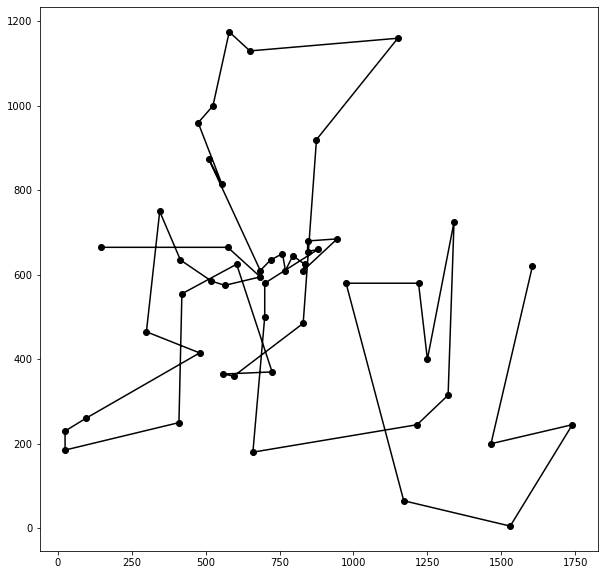

In [66]:
it_1, it_2 = 20, 1000
score_route = []
for _ in tqdm(range(it_1)):
    route = np.random.permutation(n)
    s = score(route)
    for _ in range(it_2):
        tmp_route = slight_change(route)
        tmp_s = score(tmp_route)
        if tmp_s < s:
            s = tmp_s
            route = tmp_route
        else:
            break
    score_route.append([s, route])
best_score, best_route = min(score_route)
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()      

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

In [4]:
#YOUR_CODE

### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.

In [5]:
#YOUR_CODE